# **Train Chess Peace Detection Model - YOLOv8**

For Train the object detction model I am using the SOTA object detection model **YOLOv8**

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Yolo_chess_project/YOLOv8

/content/drive/MyDrive/Yolo_chess_project/YOLOv8


In [ ]:
!nvidia-smi

Tue Jan 17 04:25:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Yolo_chess_project/YOLOv8


#### Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/78.2 GB disk)


In [ ]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Download Modified Dataset in Roboflow with YOLOv8 text type annotations

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ILLoEbPVZgGijhAaBBpr")
project = rf.workspace("pamudu-ranasinghe-40u8b").project("modified-chess-peaces")
dataset = project.version(1).download("yolov8")

/content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0ecf2f0bad56e136f31b05910d21e49a4f0bde59a9a946bcab6f62bc9057f8c5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found exis

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Modified-Chess-Peaces-1 in yolov8:: 100%|██████████| 1398/1398 [00:08<00:00, 165.82it/s]


####Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=416

/content/drive/MyDrive/Yolo_chess_project/YOLOv8
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1673897450.e608b0c50e4e.5854.0  train_batch3420.jpg
F1_curve.png					    train_batch3421.jpg
P_curve.png					    train_batch3422.jpg
PR_curve.png					    val_batch0_labels.jpg
predictions.json				    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    weights
train_batch0.jpg


/content/drive/MyDrive/Yolo_chess_project/YOLOv8


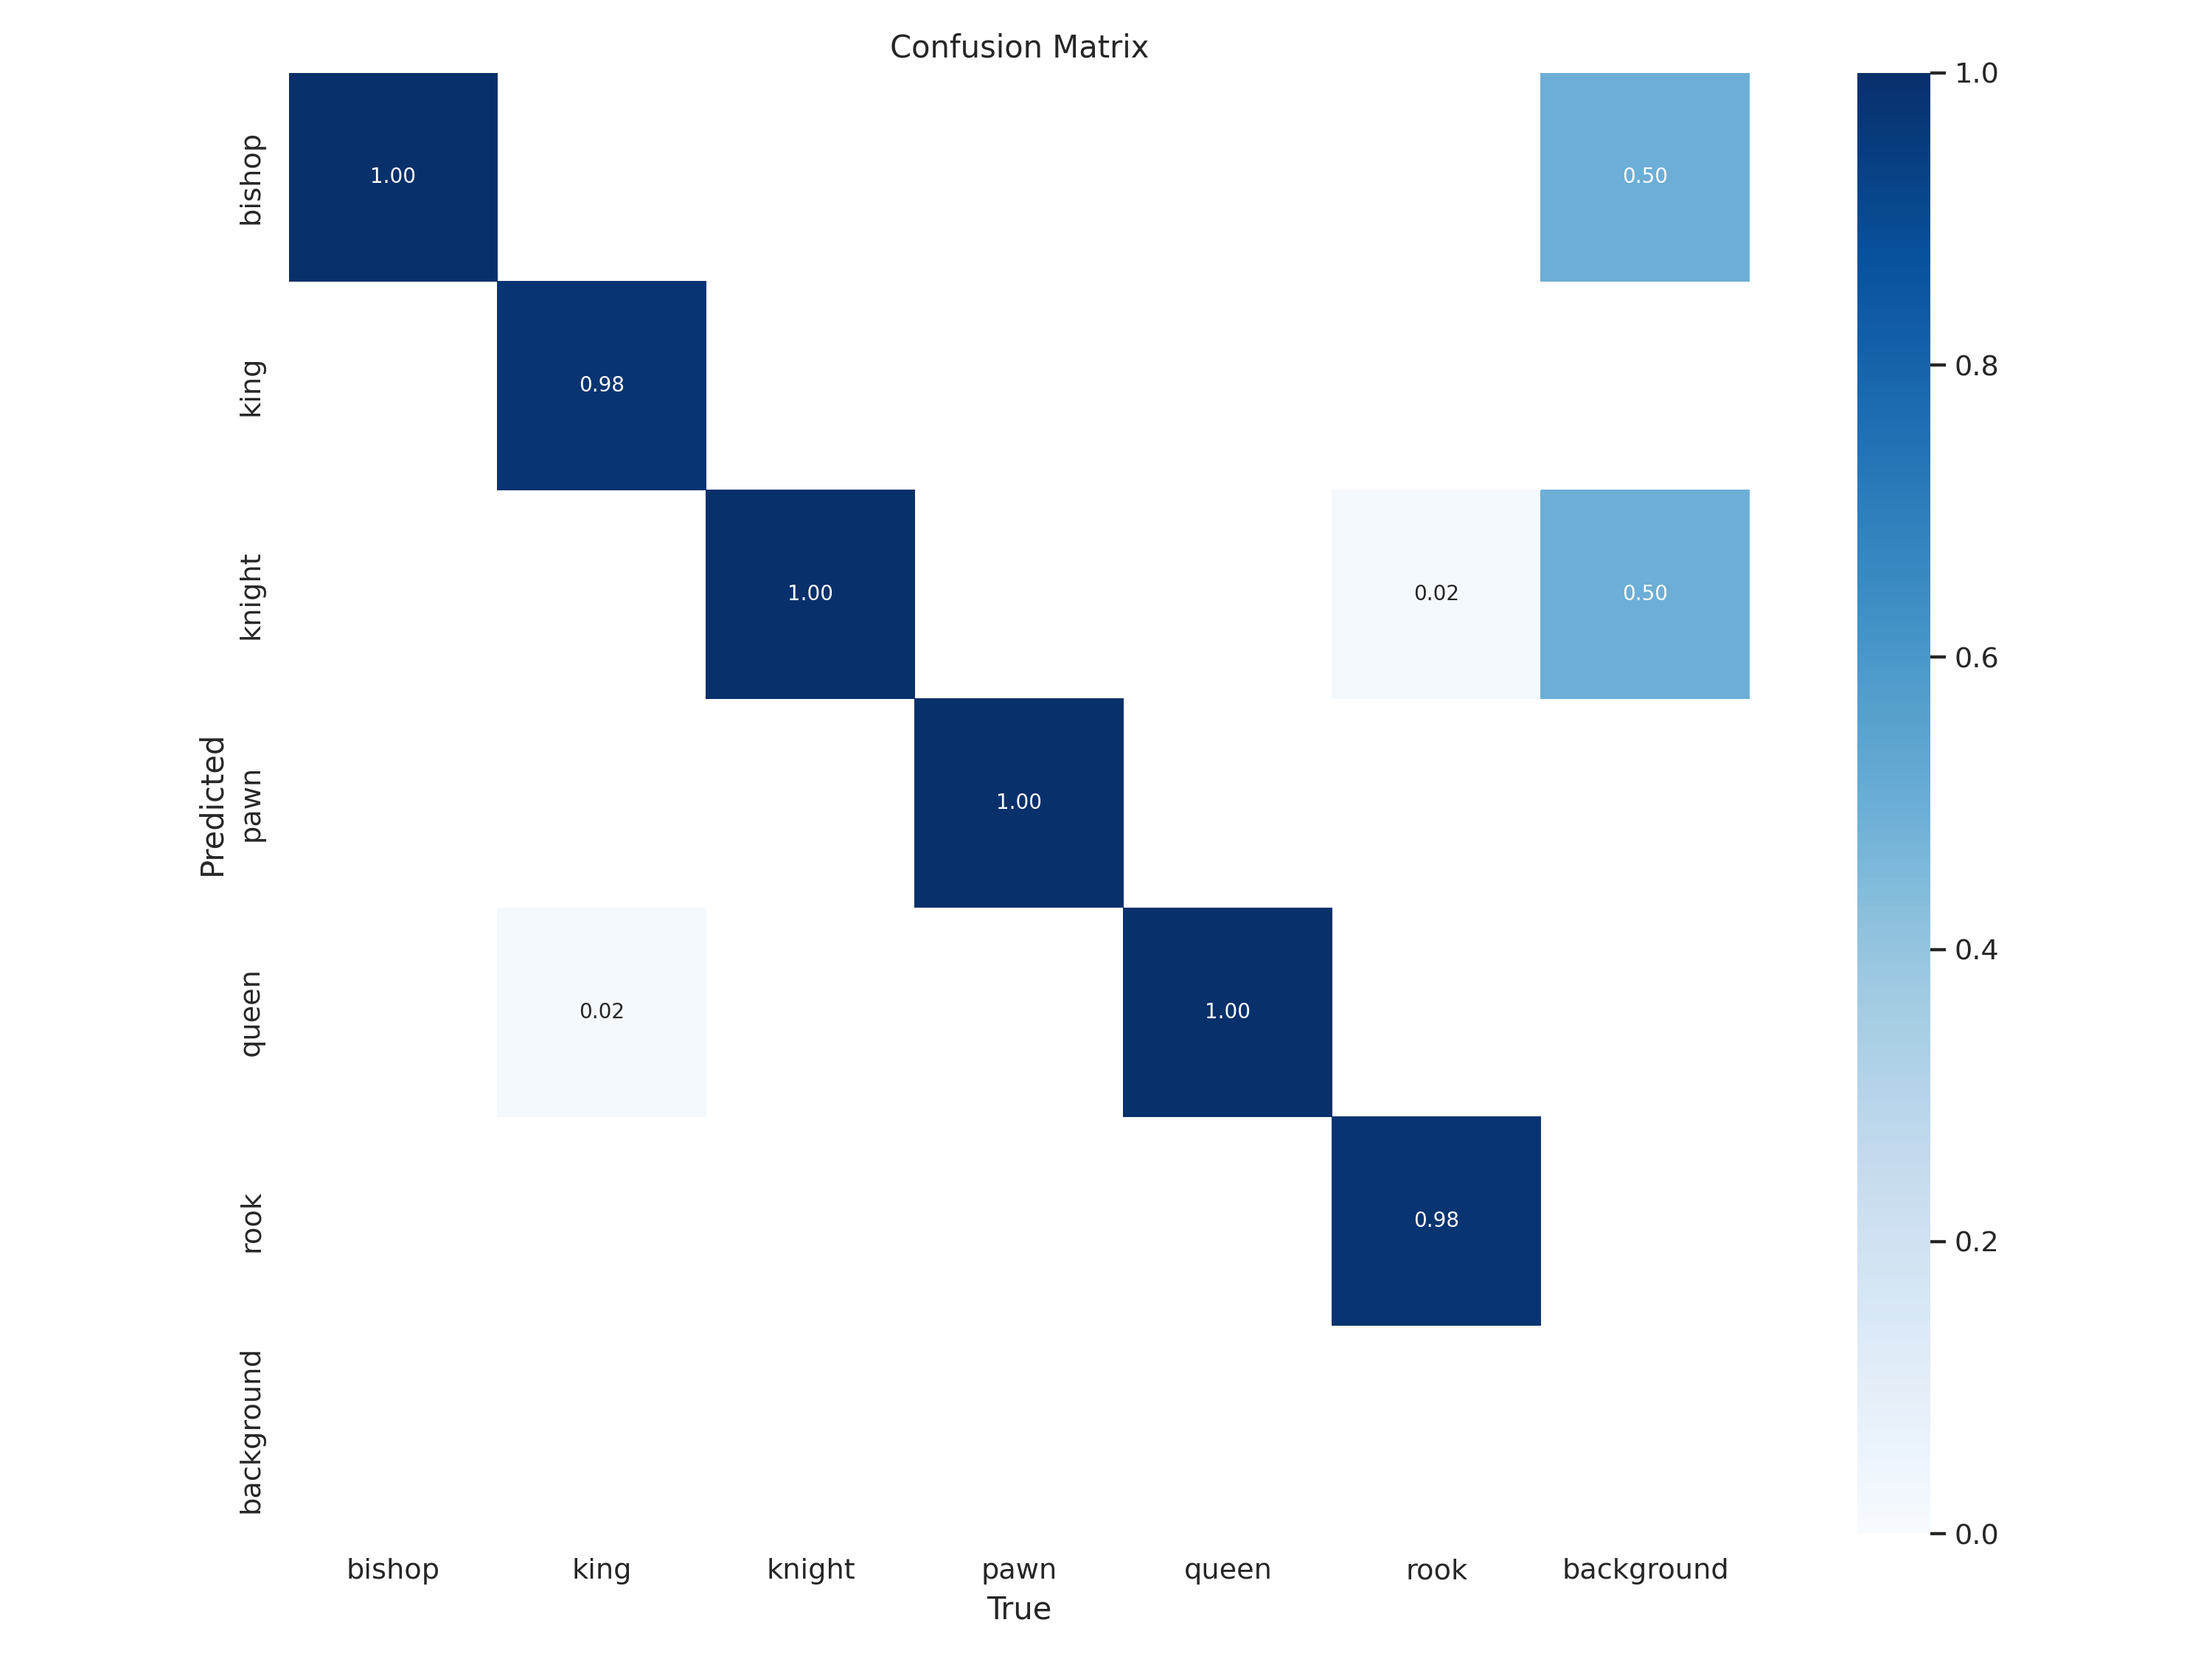

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content/drive/MyDrive/Yolo_chess_project/YOLOv8


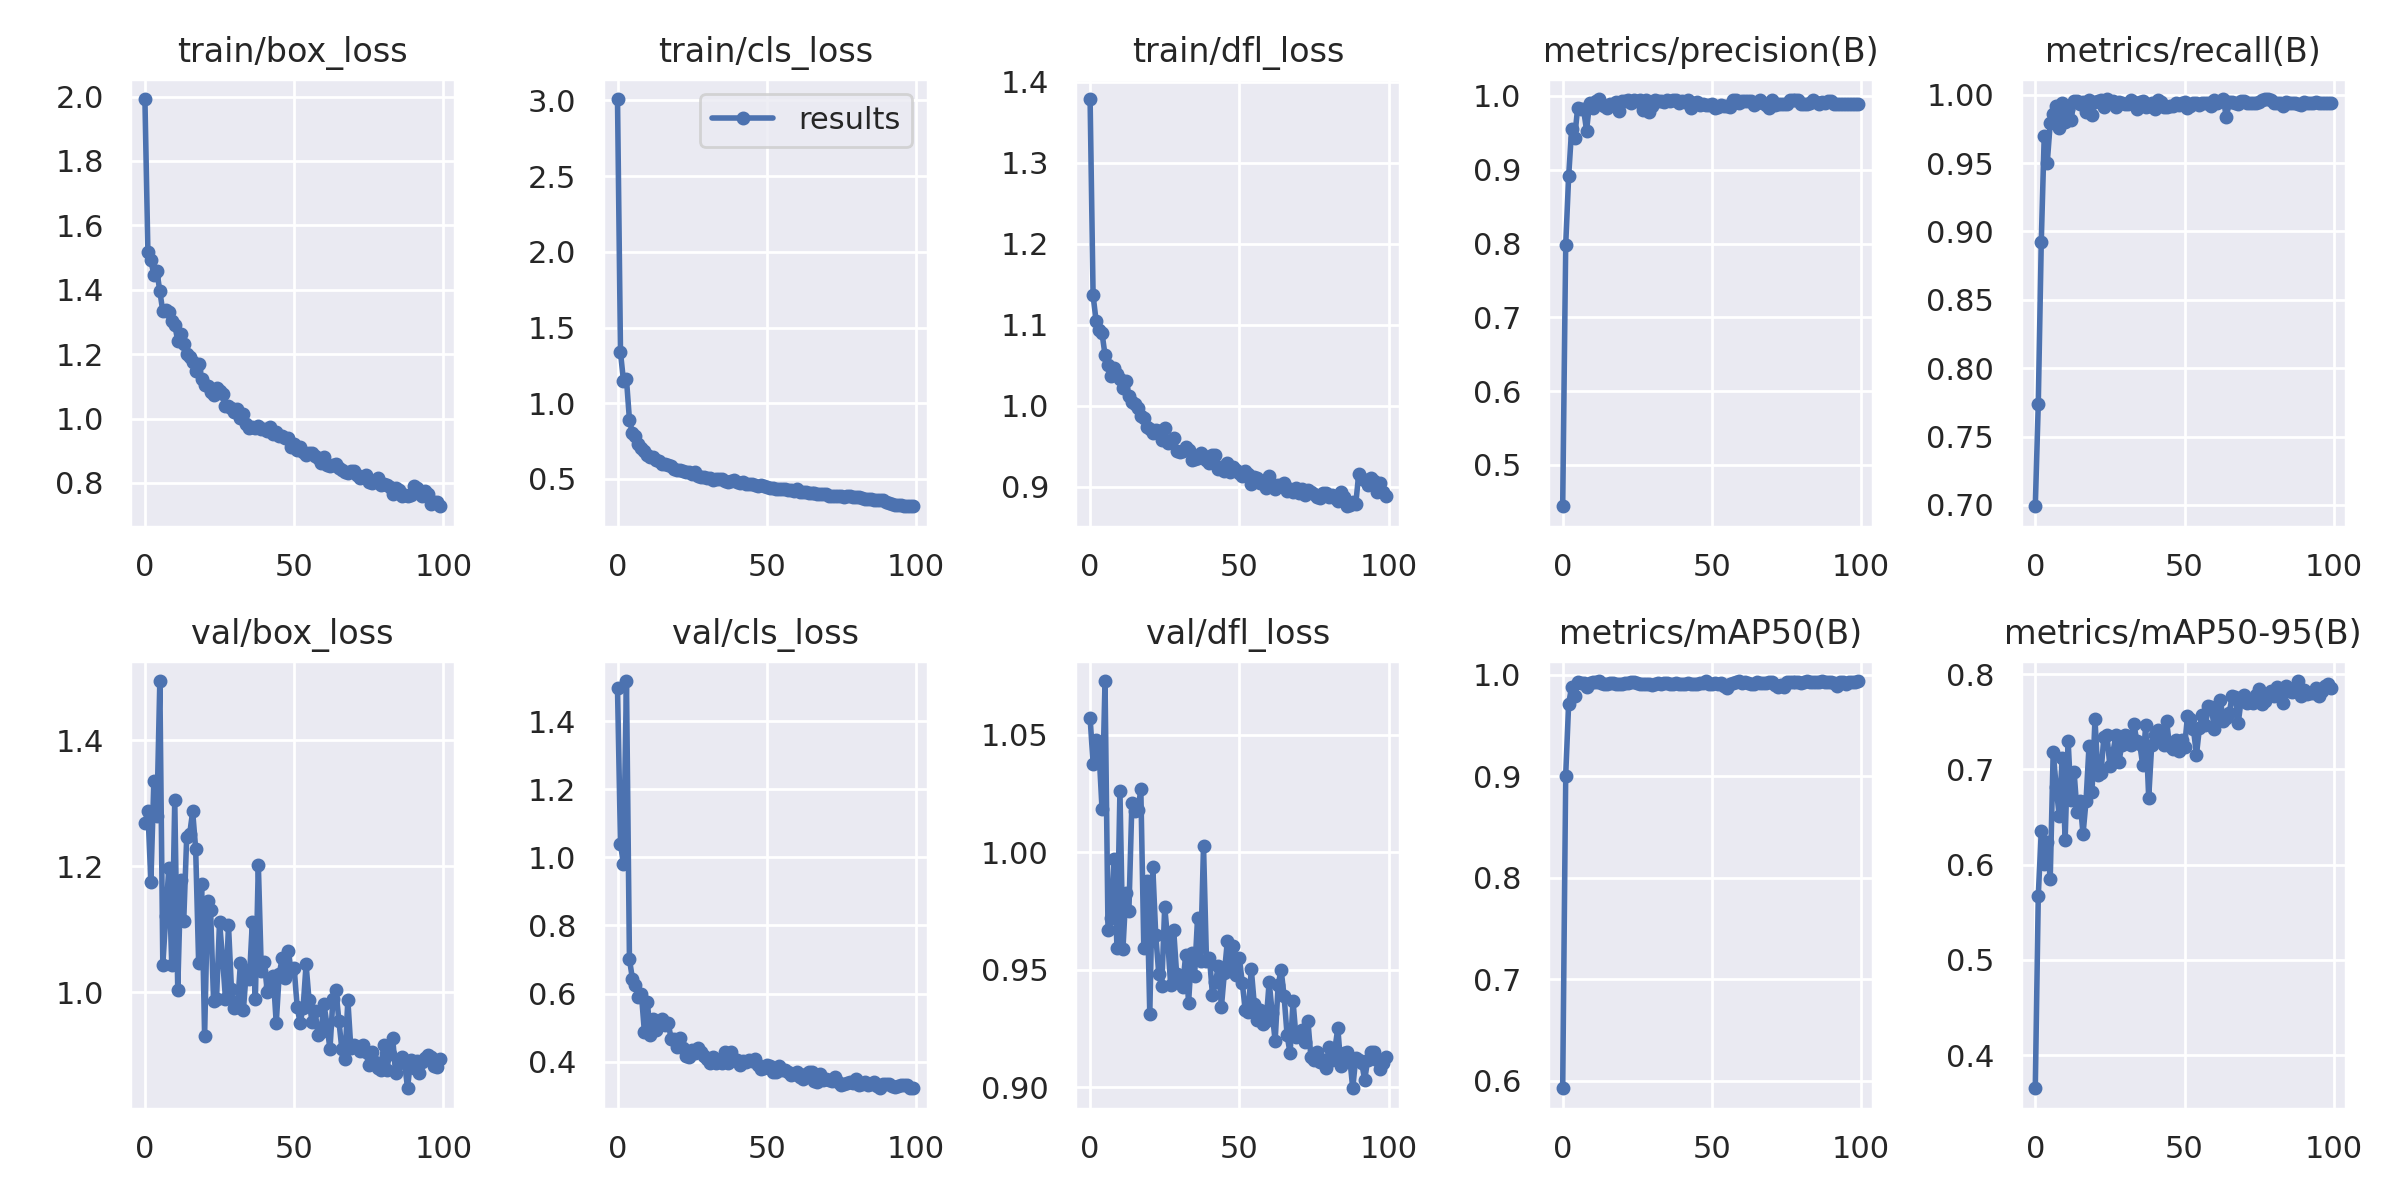

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content/drive/MyDrive/Yolo_chess_project/YOLOv8


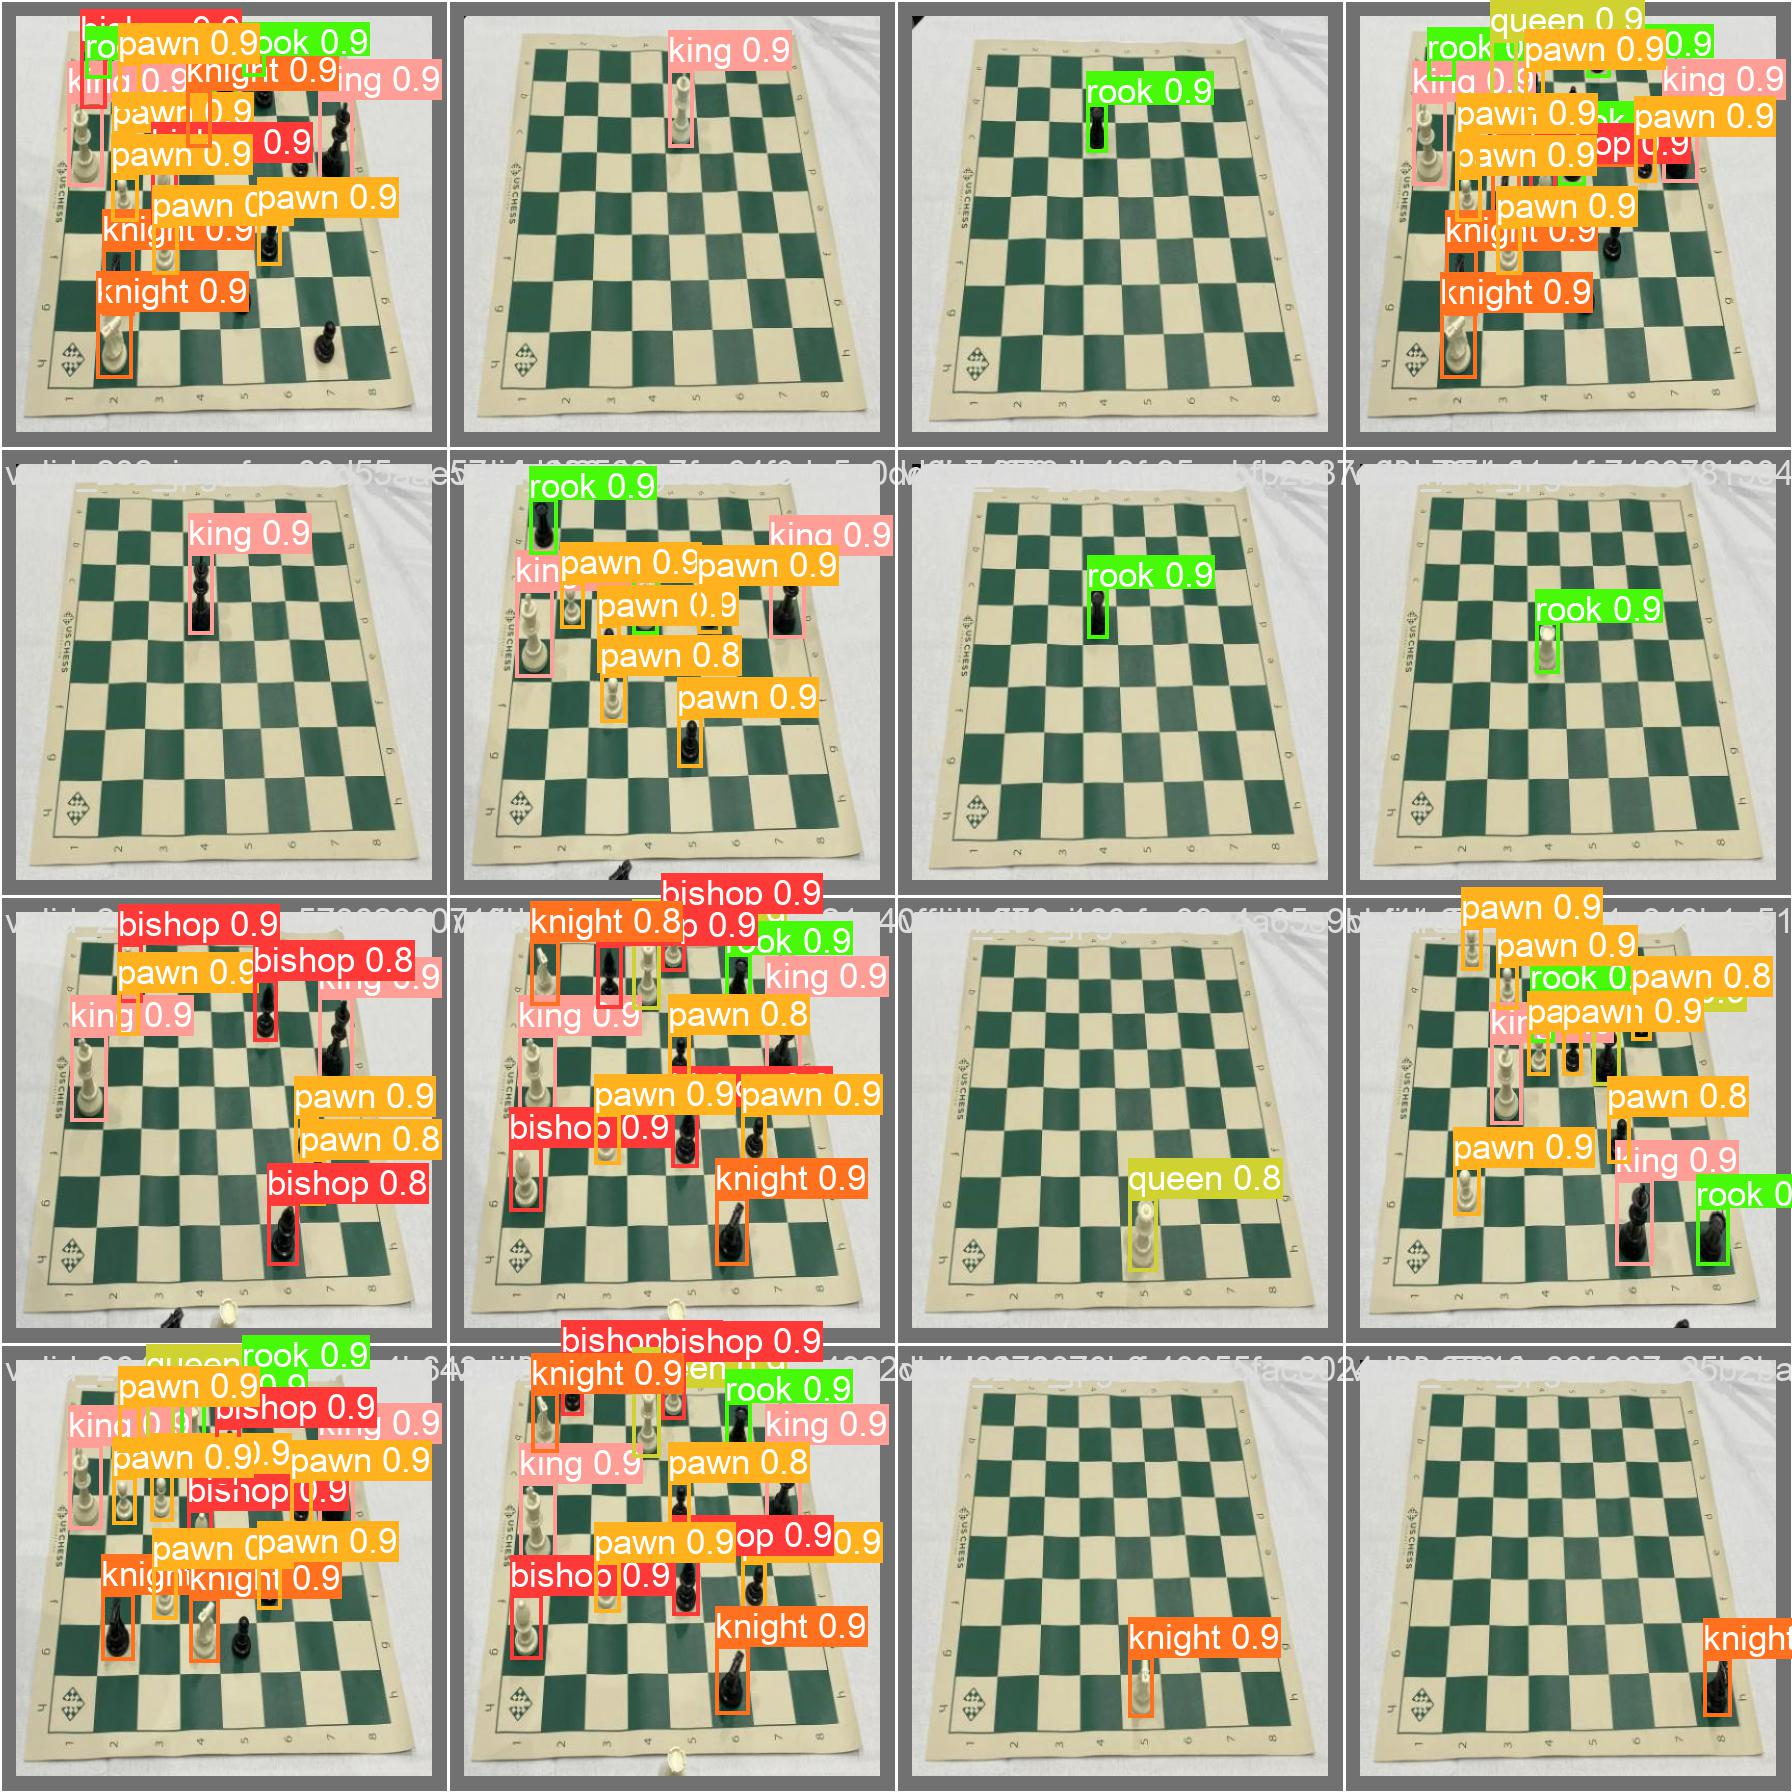

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

#### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Yolo_chess_project/YOLOv8
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.30it/s]
                   all         58        386      0.986      0.995      0.995      0.751
                bishop         58         44          1          1      0.995      0.721
                  king         58         58          1      0.991      0.995      0.795
                knight         58         49      0.976          1      0.993      0.769
                  pawn         58        154      0.998          1      0.995      0.743
                 queen

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content/drive/MyDrive/Yolo_chess_project/YOLOv8
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/29 /content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/test/images/test_10_jpg.rf.44086d2f859d70828ece83be6da120ff.jpg: 640x640 1 knight, 17.2ms
image 2/29 /content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/test/images/test_11_jpg.rf.af253ee12254303ad70d921d2d3bde57.jpg: 640x640 1 rook, 17.1ms
image 3/29 /content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/test/images/test_12_jpg.rf.49a7d6b8a9e86f2b2745820e63a4a7f6.jpg: 640x640 4 bishops, 2 kings, 4 knights, 16 pawns, 2 queens, 4 rooks, 17.1ms
image 4/29 /content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/test/images/test_13_jpg.rf.006090379a61ce2fcf977a60b62d7789.jpg: 640x640 4 bishops, 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")